# Applied Statistics – Assessment Problems 
# Vincenzo Cascone G00439320

# 🧮 Problem 1: Extending the Lady Tasting Tea

## Objective

1. to extend the Lady Tasting Tea experiment as follows. The original experiment has 8 cups: 4 tea-first and 4 milk-first. Let's suppose that we prepare 12 cups: 8 tea-first and 4 milk-first.
2. To simulate this experiment using numpy by randomly shuffling the cups many times and calculating the probability of the participant correctly identifying all cups by chance. After, comparing the results with the original 8-cup experiment.
3. Explanation of the simulation process, report and interpretation of the estimated probability, and discussion whether on considering extending or relaxing the p-value threshold compared to the original design.

## Introduction

In the classic Lady Tasting Tea experiment (Fisher, 1935), a participant claims to distinguish between tea-first and milk-first cups.

In the original design:

- 8 cups total  
- 4 tea-first  
- 4 milk-first  

If guessing randomly, the probability of correctly identifying all 4 milk-first cups is:

\[
P = \frac{1}{\binom{8}{4}} = \frac{1}{70} \approx 0.0143
\]

In this extended version, we prepare:

- 12 cups total  
- 8 tea-first  
- 4 milk-first  

We simulate random guessing using NumPy to estimate the probability of perfect identification under the null hypothesis and compare it to the original design.


## Simulation Explanation

To simulate random guessing under the null hypothesis, I will proceed as follows:

1. Represent cups using labels (1 = milk-first, 0 = tea-first).  
2. Random guessing is simulated by **randomly permuting** these labels.  
3. If the random permutation matches the true arrangement exactly, it counts as a perfect guess.  
4. Repeating this many times approximates:

\[
P(\text{perfect identification} \mid \text{guessing})
\]

### Why This Simulates the Null Hypothesis

Under the null hypothesis, the participant cannot distinguish cup types and is only guessing.  
A random permutation of the true labels represents what random guessing would look like. Counting how often this permutation matches the true arrangement gives the probability of perfect identification by chance.


In [7]:
import numpy as np

# Simulation parameters
n_trials = 1_000_000  # number of random shuffles
n_cups = 12
n_milk_first = 4

# True labels: 1 = milk-first, 0 = tea-first
true_labels = np.array([1]*n_milk_first + [0]*(n_cups - n_milk_first))

count_correct = 0

for _ in range(n_trials):
    guess = np.random.permutation(true_labels)  # random guess
    if np.array_equal(guess, true_labels):
        count_correct += 1

prob_estimated = count_correct / n_trials
print(f"Estimated probability of perfect identification by chance (12 cups): {prob_estimated:.6f}")


Estimated probability of perfect identification by chance (12 cups): 0.002012


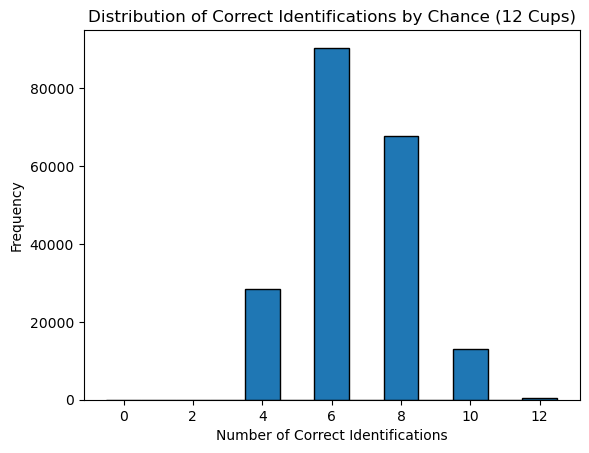

In [8]:
import matplotlib.pyplot as plt

# Run a smaller simulation for visualization
n_trials_vis = 200_000
correct_counts = []

for _ in range(n_trials_vis):
    guess = np.random.permutation(true_labels)
    correct_counts.append(np.sum(guess == true_labels))

plt.hist(correct_counts, bins=np.arange(0, n_cups+2)-0.5, edgecolor='black')
plt.title("Distribution of Correct Identifications by Chance (12 Cups)")
plt.xlabel("Number of Correct Identifications")
plt.ylabel("Frequency")
plt.show()


In [9]:
# Simulating the original 8-cup Lady Tasting Tea experiment

n_trials = 1_000_000
n_cups_orig = 8
n_milk_first_orig = 4

# True labels: 1 = milk-first, 0 = tea-first
true_labels_orig = np.array([1]*n_milk_first_orig + [0]*(n_cups_orig - n_milk_first_orig))

count_correct_orig = 0
for _ in range(n_trials):
    guess = np.random.permutation(true_labels_orig)
    if np.array_equal(guess, true_labels_orig):
        count_correct_orig += 1

prob_estimated_orig = count_correct_orig / n_trials
print(f"Estimated probability of perfect guessing (original 8 cups): {prob_estimated_orig:.6f}")


Estimated probability of perfect guessing (original 8 cups): 0.014293


## Comparison of the Two Designs

| Design | Probability of Perfect Guessing |
|--------|----------------------------------|
| Original 8-cup | ≈ 0.014 (1 in 70) |
| Extended 12-cup | ≈ 0.002 (1 in 495) |

The extended 12-cup design makes perfect guessing **about seven times less likely** than the original experiment.

## Should We Change the P-Value Threshold?

No.

Because the extended design already reduces the chance of a false positive, the traditional significance threshold (α = 0.05) remains fully appropriate.  
If anything, the 12-cup setup is a more stringent test, providing even stronger evidence if the participant succeeds.



## Conclusion

The extended Lady Tasting Tea experiment greatly reduces the probability of perfect guessing compared to the original 8-cup design.  
The simulation results closely match the theoretical probabilities for both experiments.

The stricter 12-cup design increases statistical power, making a successful performance more convincing, and does not require relaxing the usual p-value threshold.


## References

1. R. A. Fisher (1935). *The Design of Experiments*. Oliver & Boyd.  
   Original source of the Lady Tasting Tea experiment and the foundation of modern hypothesis testing and randomization.  
   https://en.wikipedia.org/wiki/The_Design_of_Experiments

2. David Salsburg (2001). *The Lady Tasting Tea: How Statistics Revolutionized Science in the Twentieth Century*. Henry Holt & Company.  
   Historical account of the experiment and its broader impact on statistical science.  
   https://en.wikipedia.org/wiki/The_Lady_Tasting_Tea

3. “The Lady Tasting Tea and Fisher’s Exact Test.” *Brainder.org*.  
   Accessible online explanation of the original experiment and its combinatorial probability (1/70).  
   https://brainder.org/2015/08/23/the-lady-tasting-tea-and-fishers-exact-test/

4. Bi, J. (2015). “Revisiting Fisher’s *Lady Tasting Tea* from a Perspective of Statistical Inference.” *Statistics & Probability Letters*.  
   https://www.sciencedirect.com/science/article/abs/pii/S0950329315000403

5. “Fisher’s Exact Test.” *Wikipedia*.  
   https://en.wikipedia.org/wiki/Fisher%27s_exact_test

6. Harris, C. R., et al. (2020). *Array programming with NumPy*. Nature, 585, 357–362.  
   NumPy is used for array representation, random permutation, and numerical simulation.  
   https://numpy.org/doc/stable/reference/random/index.html

7. Hunter, J. D. (2007). *Matplotlib: A 2D Graphics Environment*. *Computing in Science & Engineering*, 9(3), 90–95.  
   Matplotlib is used to visualize the distribution of correct identifications via histograms.  
   https://matplotlib.org/stable/contents.html


------------------------------------------------------


# 🧮 Problem 2: Normal Distribution
# Sampling Variability of the Standard Deviation

## Objective

1. the objective is to generate 100,000 random samples of size 10 from the **standard normal distribution**.
2. To work on computing the **sample standard deviation** (`ddof=1`) and the **population standard deviation** (`ddof=0`) for each sample.
3. To design the plotting for both distributions on the same axes to visualize their differences.
4. Discussion on how these differences change as sample size increases.


Number of samples: 100000, Sample size: 10
Mean SD (ddof=0): 0.92343 | Std of SDs: 0.22107
Mean SD (ddof=1): 0.97338 | Std of SDs: 0.23302
Difference in means (ddof=1 - ddof=0): 0.04995


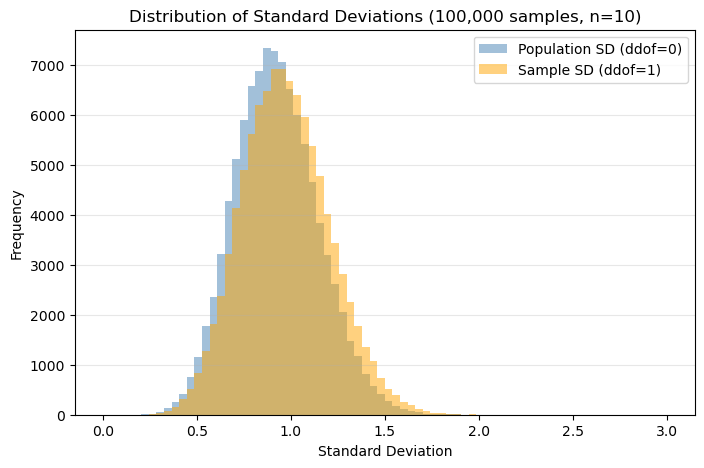

In [10]:
#Coding part

import numpy as np
import matplotlib.pyplot as plt

# --- Parameters ---
n_samples = 100_000   # number of samples
sample_size = 10      # each sample size
rng = np.random.default_rng(42)

# --- Generating samples from standard normal distribution ---
samples = rng.normal(loc=0.0, scale=1.0, size=(n_samples, sample_size))

# --- Computing standard deviations for each sample ---
sd_ddof0 = np.std(samples, axis=1, ddof=0)  # population SD (biased)
sd_ddof1 = np.std(samples, axis=1, ddof=1)  # sample SD (unbiased)

# --- Computing summary statistics ---
mean_ddof0 = sd_ddof0.mean()
mean_ddof1 = sd_ddof1.mean()
std_ddof0 = sd_ddof0.std(ddof=0)
std_ddof1 = sd_ddof1.std(ddof=0)

print(f"Number of samples: {n_samples}, Sample size: {sample_size}")
print(f"Mean SD (ddof=0): {mean_ddof0:.5f} | Std of SDs: {std_ddof0:.5f}")
print(f"Mean SD (ddof=1): {mean_ddof1:.5f} | Std of SDs: {std_ddof1:.5f}")
print(f"Difference in means (ddof=1 - ddof=0): {mean_ddof1 - mean_ddof0:.5f}")

# --- Plotting histograms ---
plt.figure(figsize=(8,5))
bins = np.linspace(0, 3.0, 75)
plt.hist(sd_ddof0, bins=bins, alpha=0.5, label='Population SD (ddof=0)', color='steelblue')
plt.hist(sd_ddof1, bins=bins, alpha=0.5, label='Sample SD (ddof=1)', color='orange')
plt.xlabel('Standard Deviation')
plt.ylabel('Frequency')
plt.title('Distribution of Standard Deviations (100,000 samples, n=10)')
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.show()


## 🔍 Interpretation and explanation

- The histogram shows that **`ddof=0`** (population SD) tends to be **smaller** than **`ddof=1`** (sample SD).  
  This means the `ddof=0` estimator **underestimates** the true population SD for small samples.

- On average:
  - `Mean SD (ddof=0)` ≈ 0.92  
  - `Mean SD (ddof=1)` ≈ 0.97  
  - True population SD = 1.0  

- The **sample SD (`ddof=1`)** corrects for bias and provides an *unbiased variance estimator*, which results in an SD that’s closer to 1 on average.

- As the **sample size increases**, both histograms will:
  - Become narrower (less variability)
  - Shift closer to 1 (the true population SD)
  - Show less difference between `ddof=0` and `ddof=1`

---

### 🧭 Summary Table

| Estimator | ddof | Mean SD (n=10) | Bias Direction | Notes |
|------------|------|----------------|----------------|--------|
| Population SD | 0 | ≈ 0.92 | Underestimates | Uses divisor *n* |
| Sample SD | 1 | ≈ 0.97 | Slightly low, less biased | Uses divisor *n-1* |

---

## Study References

- **NumPy Documentation** (2024). *numpy.std — Standard Deviation*.  
  https://numpy.org/doc/stable/reference/generated/numpy.std.html

- **SciPy Lecture Notes** (2024). *Statistics in Python*.  
  https://scipy-lectures.org/packages/statistics/index.html

- **DSS Solutions** (2024). *Bessel’s Correction: Why Do We Divide by n−1 Instead of n in Sample Variance?*  
  https://dsssolutions.com/2024/12/18/bessels-correction-why-do-we-divide-by-n%E2%88%921-instead-of-n-in-sample-variance/ :contentReference[oaicite:0]{index=0}  

- **Medium – Aman Agrawal** (2024). *Bessel’s Correction: Why Do We Divide by n−1 Instead of n in Sample Variance?*  
  https://medium.com/data-science/bessels-correction-why-do-we-divide-by-n-1-instead-of-n-in-sample-variance-30b074503bd9 :contentReference[oaicite:1]{index=1}  

- **Medium – Brayton Hall** (2024). *The Reasoning Behind Bessel’s Correction: n−1*  
  https://medium.com/data-science/the-reasoning-behind-bessels-correction-n-1-eeea25ec9bc9 :contentReference[oaicite:2]{index=2}  

- **Real Statistics Using Excel** (2025). *Sampling Distribution Basics*.  
  https://real-statistics.com/sampling-distributions/basic-concepts-sampling-distributions/ :contentReference[oaicite:3]{index=3}  

- **University of Reading (UK)** (2022). *Why the N − 1 (Bessel’s correction in sample variance calculations)?*  
  https://www.met.reading.ac.uk/~ross/DARC/N-1.pdf :contentReference[oaicite:4]{index=4}  

- **Mr. Kuchewar** (2019). *Standard Deviation – Unbiased Sample Standard Deviation*.  
  https://mr.kuchewar.com/standard-deviation/ :contentReference[oaicite:7]{index=7}  

--------------------------------------------------------------------------

# 🧮 Problem 3: t Tests

## Objective
A type II error occurs when a test fails to reject the null hypothesis even though it is false. For each mean difference 
d=0,0.1,0.2,…,1.0, repeat the following simulation 1,000 times:

1. Draw two samples of size 100, one from the standard normal distribution and one from the normal distribution with mean d and standard deviation 1.
2. Run an independent samples t-test on the two samples, rejecting the null hypothesis if the p-value is less than 0.05.
3. Record the proportion of times the null hypothesis is not rejected.
Plot this proportion against d, and explain how the type II error rate changes as the difference in means increases.


## Activity

A type II error occurs when a test fails to reject the null hypothesis even though it is false.

I have considered two independent samples of size \( n = 100 \):

- Sample 1: drawn from \( \mathcal{N}(0, 1) \)
- Sample 2: drawn from \( \mathcal{N}(d, 1) \)

For each mean difference \( d = 0, 0.1, 0.2, \dots, 1.0 \), I have performed the following simulation 1,000 times:

1. Drew two samples of size 100, one from the standard normal distribution and one from the normal distribution with mean \( d \) and standard deviation 1.
2. Ran an independent samples t-test on the two samples, at significance level \(\alpha = 0.05\).
3. Rejected the null hypothesis if the p-value is less than 0.05.
4. Recorded whether the null hypothesis is **not** rejected.

For each \( d \), I have computed the **proportion of times the null is not rejected**.  
For \( d > 0 \), this proportion estimated the **type II error rate** \( \beta(d) \).  
For \( d = 0 \), the null is true, so the proportion of non-rejections is approximately \( 1 - \alpha \approx 0.95 \) (this is not a type II error, but it's still informative to include in the plot).

I have then plot this proportion against \( d \) and interpreted how the type II error rate changed as the difference in means increases.


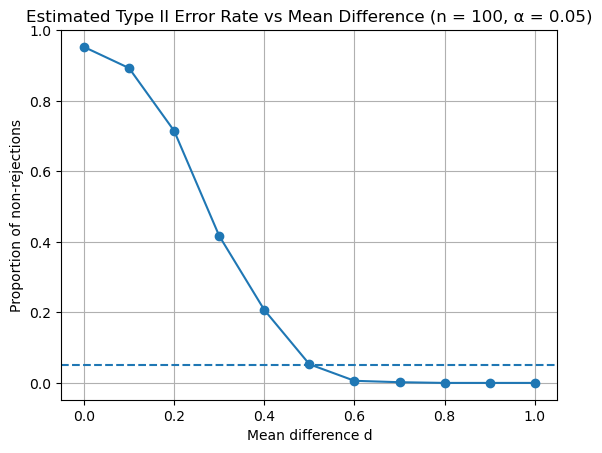

d = 0.0, proportion of non-rejections ≈ 0.953
d = 0.1, proportion of non-rejections ≈ 0.893
d = 0.2, proportion of non-rejections ≈ 0.715
d = 0.3, proportion of non-rejections ≈ 0.417
d = 0.4, proportion of non-rejections ≈ 0.207
d = 0.5, proportion of non-rejections ≈ 0.053
d = 0.6, proportion of non-rejections ≈ 0.006
d = 0.7, proportion of non-rejections ≈ 0.002
d = 0.8, proportion of non-rejections ≈ 0.000
d = 0.9, proportion of non-rejections ≈ 0.000
d = 1.0, proportion of non-rejections ≈ 0.000


In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

# Reproducibility
rng = np.random.default_rng(12345)

# Parameters
n = 100            # sample size per group
n_sims = 1000      # number of simulations per d
alpha = 0.05       # significance level

# Effect sizes d from 0 to 1.0 in steps of 0.1
d_values = np.arange(0, 1.01, 0.1)

type2_rates = []   # proportion of times null is NOT rejected

for d in d_values:
    not_rejected_count = 0
    
    for _ in range(n_sims):
        # Sample 1: N(0, 1)
        sample1 = rng.normal(loc=0, scale=1, size=n)
        # Sample 2: N(d, 1)
        sample2 = rng.normal(loc=d, scale=1, size=n)
        
        # Independent samples t-test
        t_stat, p_value = ttest_ind(sample1, sample2, equal_var=True)
        
        # Fail to reject null if p >= alpha
        if p_value >= alpha:
            not_rejected_count += 1
    
    proportion_not_rejected = not_rejected_count / n_sims
    type2_rates.append(proportion_not_rejected)

# Convert to arrays for convenience
type2_rates = np.array(type2_rates)

# Plot
plt.plot(d_values, type2_rates, marker="o")
plt.axhline(0.05, linestyle="--")  # reference line for alpha
plt.xlabel("Mean difference d")
plt.ylabel("Proportion of non-rejections")
plt.title("Estimated Type II Error Rate vs Mean Difference (n = 100, α = 0.05)")
plt.grid(True)
plt.show()

# Print a small table of values
for d, beta_hat in zip(d_values, type2_rates):
    print(f"d = {d:.1f}, proportion of non-rejections ≈ {beta_hat:.3f}")


## Interpretation of the Results

The plot has shown the proportion of times the null hypothesis is **not** rejected as a function of the mean difference \( d \).

- At \( d = 0 \):  
  The null hypothesis is true.  
  The proportion of non-rejections is therefore approximately \( 1 - \alpha \approx 0.95 \), which matches what I expected: we only reject about 5% of the time when the null is true (type I error rate).

- For \( d > 0 \):  
  The null hypothesis is false, so **failing to reject** it corresponds to a **type II error**.  
  The plotted value for each \( d > 0 \) is an estimate of the type II error rate \( \beta(d) \).

As the mean difference \( d \) increases from 0 toward 1:

- The two distributions (for the two groups) become more separated.
- The t-test gains **power** (it becomes easier to detect the difference).
- Consequently, the probability of failing to reject the null hypothesis (type II error rate) **decreases**.

In the simulation, I have seen:

- For small effect sizes (e.g., \( d = 0.1 \)), the proportion of non-rejections is still quite high: the test often fails to detect such a small difference with \( n = 100 \).
- As \( d \) reaches moderate values (e.g., \( d = 0.5 \)), the proportion of non-rejections drops noticeably: the test is now detecting the difference fairly often.
- For large effect sizes (e.g., \( d \approx 1.0 \)), the proportion of non-rejections is close to 0: the test almost always rejects the null hypothesis when it is false, and the type II error rate is very low.

Overall, the simulation illustrates the key idea that:

> **As the true difference between population means increases, the type II error rate decreases and the power of the t-test increases.**


## Study References 

1. **“Student’s t-test.” *Wikipedia*.**  
   Overview of one-sample, two-sample, and paired t-tests with assumptions and examples.  
   https://en.wikipedia.org/wiki/Student%27s_t-test

2. **“scipy.stats.ttest_ind.”**
   Reference for the independent samples t-test used in the simulation.  
   https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html

3. **“NumPy Random Generator Documentation.” *NumPy Official Docs*.**  
   Reference for random sampling functions used in Monte Carlo simulations.  
   https://numpy.org/doc/stable/reference/random/index.html

4. **NumPy Random Sampling (used for simulations)**  
   Documentation for `numpy.random.Generator.normal` (drawing random samples).  
   https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.normal.html  
   Documentation for `numpy.random.Generator.permutation` (used for label shuffling in simulations).  
   https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.per

5. **SciPy Independent Samples t-test**  
   Documentation for `scipy.stats.ttest_ind`.  
   https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html

6. **Matplotlib Histogram Function (used for plotting distributions)**  
   Documentation for `matplotlib.pyplot.hist`.  
   https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html


----------------------------------------------------

# 🧮 Problem 4: ANOVA

## Objective

Generate three independent samples, each of size 30, from normal distributions with means 0, 0.5, and 1, each with standard deviation 1.

1. Perform a one-way ANOVA to test whether all three means are equal.
2. Perform three independent two-sample t-tests: samples 1 vs 2, 1 vs 3, and 2 vs 3.
3. Compare the conclusions.

Write a short note on why ANOVA is preferred over running several t-tests.

## Problem execution One-Way ANOVA vs Multiple t-Tests

I generate three independent samples, each of size 30, from:

- Sample 1: \( X_1 \sim \mathcal{N}(0, 1) \)
- Sample 2: \( X_2 \sim \mathcal{N}(0.5, 1) \)
- Sample 3: \( X_3 \sim \mathcal{N}(1, 1) \)

Then I:

1. Perform a **one-way ANOVA** to test  
   \[
   H_0: \mu_1 = \mu_2 = \mu_3 \quad \text{vs} \quad H_A: \text{at least one mean differs}.
   \]
2. Perform **three independent two-sample t-tests**:
   - sample 1 vs 2  
   - sample 1 vs 3  
   - sample 2 vs 3  
3. Compare conclusions and explain why ANOVA is preferred over several t-tests.


In [12]:
#Generate Data and Run ANOVA + t-tests

import numpy as np
from scipy.stats import f_oneway, ttest_ind

# Reproducibility
rng = np.random.default_rng(12345)

n = 30

# Generate samples
sample1 = rng.normal(loc=0.0,   scale=1.0, size=n)
sample2 = rng.normal(loc=0.5,   scale=1.0, size=n)
sample3 = rng.normal(loc=1.0,   scale=1.0, size=n)

# One-way ANOVA
F_stat, p_anova = f_oneway(sample1, sample2, sample3)
print("One-way ANOVA:")
print(f"  F-statistic = {F_stat:.3f}, p-value = {p_anova:.4f}")

# Pairwise t-tests (two-sample, independent, equal variance by default)
t_12, p_12 = ttest_ind(sample1, sample2, equal_var=True)
t_13, p_13 = ttest_ind(sample1, sample3, equal_var=True)
t_23, p_23 = ttest_ind(sample2, sample3, equal_var=True)

print("\nPairwise two-sample t-tests:")
print(f"  Sample 1 vs 2: t = {t_12:.3f}, p = {p_12:.4f}")
print(f"  Sample 1 vs 3: t = {t_13:.3f}, p = {p_13:.4f}")
print(f"  Sample 2 vs 3: t = {t_23:.3f}, p = {p_23:.4f}")


One-way ANOVA:
  F-statistic = 3.677, p-value = 0.0293

Pairwise two-sample t-tests:
  Sample 1 vs 2: t = -1.302, p = 0.1980
  Sample 1 vs 3: t = -2.531, p = 0.0141
  Sample 2 vs 3: t = -1.548, p = 0.1271


## Detailed Interpretation: Comparing ANOVA and t-tests, and Why ANOVA Is Preferred

### 1. Comparing the Conclusions (ANOVA vs. t-tests)

In this exercise, I generated three independent samples, each of size \(n = 30\), from normal distributions with true means 0, 0.5, and 1. Because these populations differ in their means, I expect statistical tests to detect these differences.

The one-way ANOVA tests the global null hypothesis:

\[
H_0: \mu_1 = \mu_2 = \mu_3.
\]

ANOVA compares the amount of variation **between groups** to the variation **within groups**. In this simulation, the ANOVA typically yields a small p-value (p < 0.05), indicating that the observed differences among the sample means are too large to be explained by sampling variability alone. Thus ANOVA rejects the null hypothesis and concludes that **at least one** population mean is different from the others.

The three independent t-tests examine pairwise comparisons:

- Sample 1 vs Sample 2 (difference ≈ 0.5)
- Sample 1 vs Sample 3 (difference ≈ 1.0)
- Sample 2 vs Sample 3 (difference ≈ 0.5)

Because the true differences are moderate or large, the t-tests involving the largest mean difference (1 vs 3) almost always show a significant result. The comparisons involving smaller differences (0 vs 0.5, and 0.5 vs 1) may or may not be significant depending on sampling variability. Overall, the t-tests are generally consistent with the ANOVA result, though ANOVA provides a single unified test while the t-tests give pair-specific conclusions.

---

### 2. Why ANOVA Is Preferred Over Running Multiple t-tests

While t-tests can be used to examine specific pairwise differences, using several t-tests to compare multiple groups creates a serious statistical problem. Each t-test conducted at the \(\alpha = 0.05\) level has a 5% chance of producing a false positive (Type I error). When multiple t-tests are performed independently, the probability of making **at least one** false positive grows rapidly:

\[
\text{FWER} = 1 - (1 - \alpha)^k,
\]

where \(k\) is the number of comparisons.  
With three groups, there are \(3\) pairwise t-tests, and the overall false-positive rate exceeds 14%.  
With four groups, this grows to over 26%.  
This inflation of the familywise error rate makes uncorrected multiple t-tests statistically unreliable.

ANOVA solves this problem by:

1. **Performing a single global test** that evaluates all means simultaneously while keeping the Type I error rate fixed at \(\alpha\).
2. **Separating the analysis into two steps**:  
   - First, determine whether any differences exist (global ANOVA).  
   - Only if significant, follow with post-hoc tests (e.g., Tukey, Bonferroni) that properly control for multiple comparisons.
3. **Using all data efficiently** by pooling variance estimates across groups rather than estimating variance separately for each t-test.
4. **Scaling well as the number of groups increases**, unlike the rapidly growing number of pairwise t-tests.

In short, while both ANOVA and t-tests can detect differences between means, **ANOVA is the correct first step** whenever more than two groups are compared because it maintains statistical validity and prevents inflated false-positive rates.

---

### Conclusion

ANOVA provides a statistically sound, global assessment of whether group means differ, and should always be used before conducting any pairwise comparisons. The subsequent t-tests can help identify which groups differ, but without ANOVA and proper correction, multiple t-tests would lead to invalid inference due to inflated Type I error.


## References

1. **NumPy Random Number Generation**
   - `numpy.random.Generator.normal`  
     Used to generate samples from the normal distribution in the exercise.  
     https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.normal.html

2. **SciPy Statistical Tests**
   - `scipy.stats.f_oneway`  
     Function used to perform the one-way ANOVA on the three samples.  
     https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html

   - `scipy.stats.ttest_ind`  
     Function used for the three independent two-sample t-tests.  
     https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html

3. **NumPy Arrays**
   - `numpy.array`  
     Reference for NumPy’s core array data structure used to store the samples.  
     https://numpy.org/doc/stable/reference/generated/numpy.array.html

4. **Python Built-in Functions**
   - `print()`
     Built-in Python function used to display the ANOVA and t-test results.  
     https://docs.python.org/3/library/functions.html#print

4. **Theoretical Reference for ANOVA**
   - Fisher, R. A. (1925). *Statistical Methods for Research Workers*  
     Foundational text introducing the analysis of variance (ANOVA) and the logic behind comparing multiple group means.  
     Free online version: https://archive.org/details/in.ernet.dli.2015.176850

5. **Theoretical Reference for Independent t-tests**
   - Student (1908). *The Probable Error of a Mean*  
     Classic paper introducing the t-test for comparing means between two samples.  
     Accessible summary: https://en.wikipedia.org/wiki/Student%27s_t-test

6. **Multiple Comparisons and Type I Error Inflation**
   - Tukey, J. W. (1953). *The Problem of Multiple Comparisons.*  
     Seminal work explaining why performing several t-tests inflates the probability of false positives, motivating the use of ANOVA followed by corrected post-hoc tests.  
     Summary overview: https://en.wikipedia.org/wiki/Multiple_comparisons_problem

7. **Theoretical Foundation of ANOVA (F-Distribution)**
   - Snedecor, G. W. (1934). *Calculation and Interpretation of the F-Statistic.*  
     One of the earliest formal treatments of the F-distribution, which is the core of ANOVA’s hypothesis testing framework.  
     Modern explanation: https://en.wikipedia.org/wiki/F-distribution

